In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import statsmodels.api as sm

import math

import datetime

import warnings
warnings.filterwarnings('ignore')

from math import sqrt

from scipy import stats


In [2]:
df = pd.read_csv("/content/WalmartDataSet.csv")

In [3]:
df.shape

(6435, 8)

In [4]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
# Change Store column to categorical type
df['Store'] = df.Store.astype('category')

In [7]:
# Change Holiday_Flag column to boolean type
df['Holiday_Flag'] = df['Holiday_Flag'].astype(bool)

In [8]:
# Change Date columns to datetime type
df["Date"] = pd.to_datetime(df["Date"])

In [9]:
df['Year'] =df['Date'].dt.year
df['Month'] =df['Date'].dt.month
df['Week'] =df['Date'].dt.week

In [10]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,1,2010-05-02,1643690.90,False,42.31,2.572,211.096358,8.106,2010,5,17
1,1,2010-12-02,1641957.44,True,38.51,2.548,211.242170,8.106,2010,12,48
2,1,2010-02-19,1611968.17,False,39.93,2.514,211.289143,8.106,2010,2,7
3,1,2010-02-26,1409727.59,False,46.63,2.561,211.319643,8.106,2010,2,8
4,1,2010-05-03,1554806.68,False,46.50,2.625,211.350143,8.106,2010,5,18


In [11]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
6430,45,2012-09-28,713173.95,False,64.88,3.997,192.013558,8.684,2012,9,39
6431,45,2012-05-10,733455.07,False,64.89,3.985,192.170412,8.667,2012,5,19
6432,45,2012-12-10,734464.36,False,54.47,4.000,192.327265,8.667,2012,12,50
6433,45,2012-10-19,718125.53,False,56.47,3.969,192.330854,8.667,2012,10,42
6434,45,2012-10-26,760281.43,False,58.85,3.882,192.308899,8.667,2012,10,43


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   category      
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   bool          
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int64         
 9   Month         6435 non-null   int64         
 10  Week          6435 non-null   int64         
dtypes: bool(1), category(1), datetime64[ns](1), float64(5), int64(3)
memory usage: 466.6 KB


In [13]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Week            0
dtype: int64

In [14]:
df.isnull()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6430,False,False,False,False,False,False,False,False,False,False,False
6431,False,False,False,False,False,False,False,False,False,False,False
6432,False,False,False,False,False,False,False,False,False,False,False
6433,False,False,False,False,False,False,False,False,False,False,False


In [15]:
# Exclude datetime column(s) from mean imputation
mean_imputation_cols = df.columns.drop(['Date'])

In [16]:
# Fill missing values with mean imputation
df.fillna(df.mean(), inplace=True)

In [17]:
# Check the number of missing values in each column
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Week            0
dtype: int64

In [18]:
# Check for duplicate rows
df.duplicated().sum()  # Count the number of duplicate rows

0

In [19]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [20]:
# Check for duplicate columns
df.columns.duplicated().sum()  # Count the number of duplicate columns

0

In [21]:
# Remove duplicate columns, if any
df = df.loc[:, ~df.columns.duplicated()]

In [22]:
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = 1.5 * IQR

df = df[(df['Weekly_Sales'] >= Q1 - outlier_threshold) & (df['Weekly_Sales'] <= Q3 + outlier_threshold)]

# EDA

In [23]:
df.describe()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
count,6.401000e+03,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000
mean,1.036130e+06,60.772042,3.359634,171.642219,8.002298,2010.967974,6.447899,25.875644
std,5.451961e+05,18.417068,0.459696,39.359852,1.878705,0.797304,3.308627,14.448448
min,2.099862e+05,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000,1.000000
25%,5.517431e+05,47.660000,2.933000,131.784000,6.891000,2010.000000,4.000000,14.000000
50%,9.572983e+05,62.860000,3.452000,182.658578,7.874000,2011.000000,6.000000,26.000000
75%,1.414565e+06,75.000000,3.737000,212.833640,8.622000,2012.000000,9.000000,38.000000
max,2.685352e+06,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000,52.000000


Min Date & Max Date

In [24]:
print('Min Date in Data is - {}'.format(df['Date'].min()))
print('Max Date in Data is - {}'.format(df['Date'].max()))

Min Date in Data is - 2010-01-10 00:00:00
Max Date in Data is - 2012-12-10 00:00:00


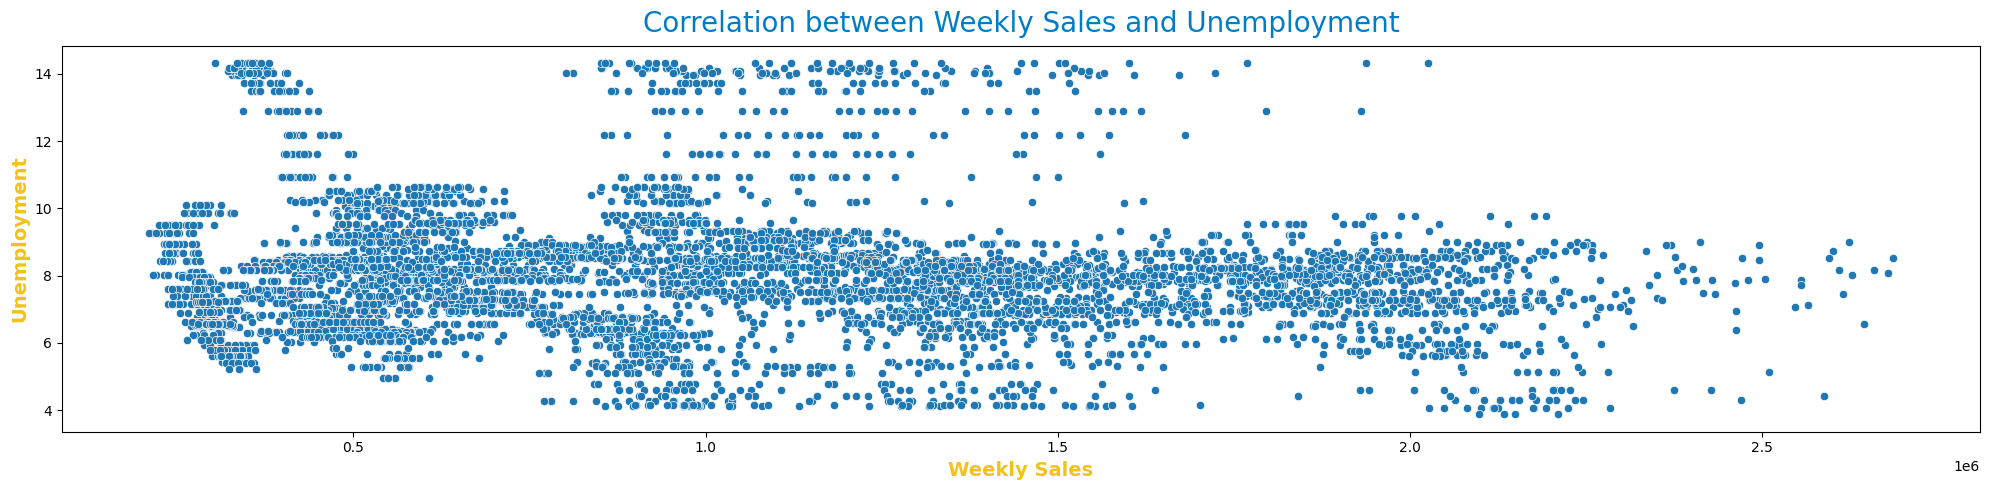

In [25]:
# Scatter plot to explore the relationship between weekly sales and unemployment rate
plt.figure(figsize=(20, 5))
sns.scatterplot(x='Weekly_Sales', y='Unemployment', data=df)

# Set the title
plt.title('Correlation between Weekly Sales and Unemployment', color='#007DC6', fontsize=20, pad=10)

# Set the x and y axis labels
plt.xlabel('Weekly Sales', color='#F1C21B',  fontweight='bold', fontsize=14)
plt.ylabel('Unemployment', color='#F1C21B',  fontweight='bold', fontsize=14)

# Adjust plot layout
plt.tight_layout()

# Display the plot
plt.show()

In [26]:
# Calculate the correlation coefficient between weekly sales and unemployment rate
correlation_coefficient = df['Weekly_Sales'].corr(df['Unemployment'])
print("Correlation Coefficient Between Weekly Sales and Unemployment Rate:", correlation_coefficient)

Correlation Coefficient Between Weekly Sales and Unemployment Rate: -0.10429750912578388


In [27]:
# Calculate the correlation between each store's weekly sales and unemployment rate
store_correlation = df.groupby('Store')['Weekly_Sales', 'Unemployment'].corr().unstack()

# Find stores with the highest negative correlation
stores_with_highest_negative_correlation = store_correlation['Weekly_Sales']['Unemployment'].idxmin()

print("Stores with the Highest Negative Correlation with Unemployment Rate:", stores_with_highest_negative_correlation)

Stores with the Highest Negative Correlation with Unemployment Rate: 38


In [28]:
# Find the top N number of stores with the highest negative correlation
n = 10  # specify the number of stores to display, you can modify this value

print("Top", n, "Stores with the Highest Negative Correlation with Unemployment Rate:")

print()

top_negative_corr_stores = store_correlation['Weekly_Sales']['Unemployment'].sort_values().head(n)

# Create a dataframe
top_negative_corr_stores_df = pd.DataFrame({'Store': top_negative_corr_stores.index, 'Negative_Correlation': top_negative_corr_stores.values})

# Set the index to start from 1
top_negative_corr_stores_df.index = top_negative_corr_stores_df.index + 1

print(top_negative_corr_stores_df.to_string(index=False))

Top 10 Stores with the Highest Negative Correlation with Unemployment Rate:

Store  Negative_Correlation
   38             -0.785290
   44             -0.780076
    4             -0.639563
   13             -0.400254
   39             -0.384681
   42             -0.356355
   41             -0.350630
   17             -0.263600
    3             -0.230413
   37             -0.221287



---


How Holidays affect the sales of each store.

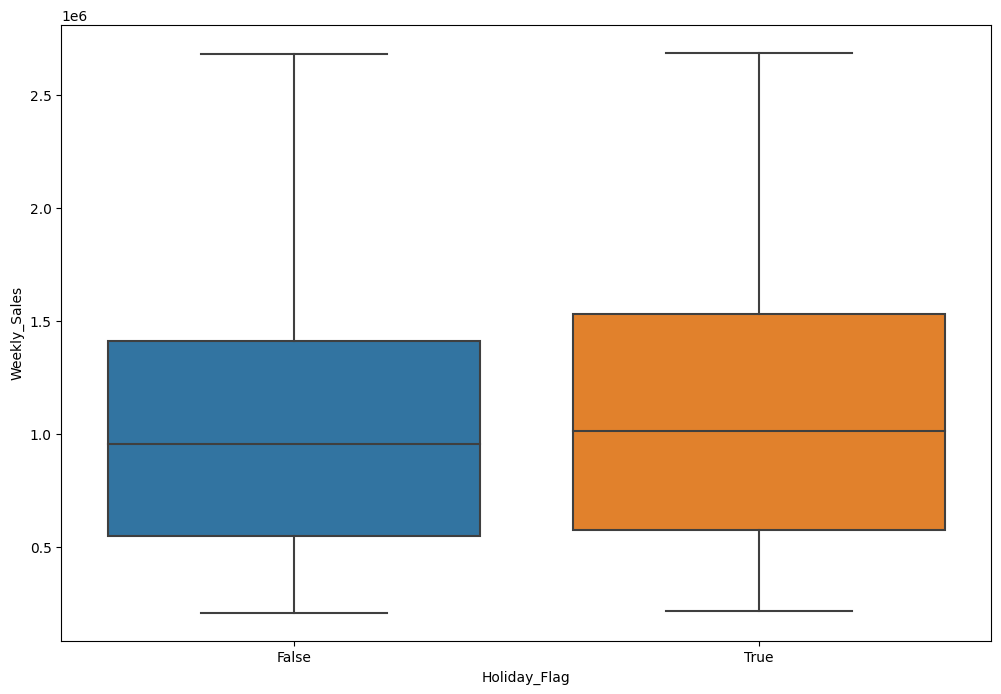

In [29]:
# impact of holidays on weekly sales
plt.figure(figsize = (12,8))
sns.boxplot(x = 'Holiday_Flag', y ='Weekly_Sales', data = df, showfliers = False)

# Mapping 0 to False and 1 to True in x-axis labels
plt.xticks([0, 1], ['False', 'True'])

plt.show()

Data Visualization

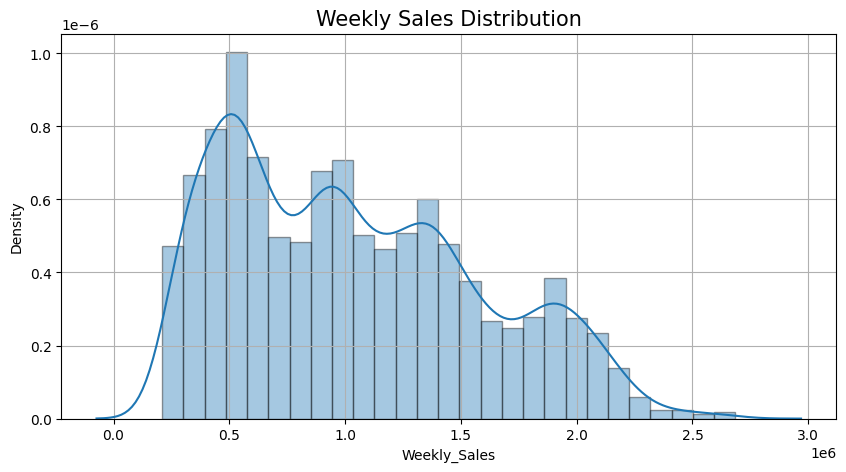

In [30]:
# Analyzing the distribution of target variable
plt.figure(figsize = (10, 5))
sns.distplot(df['Weekly_Sales'], hist_kws=dict(edgecolor="black"))
plt.title('Weekly Sales Distribution', fontsize= 15)
plt.grid()
plt.show()

Histogram of Weekly Sales

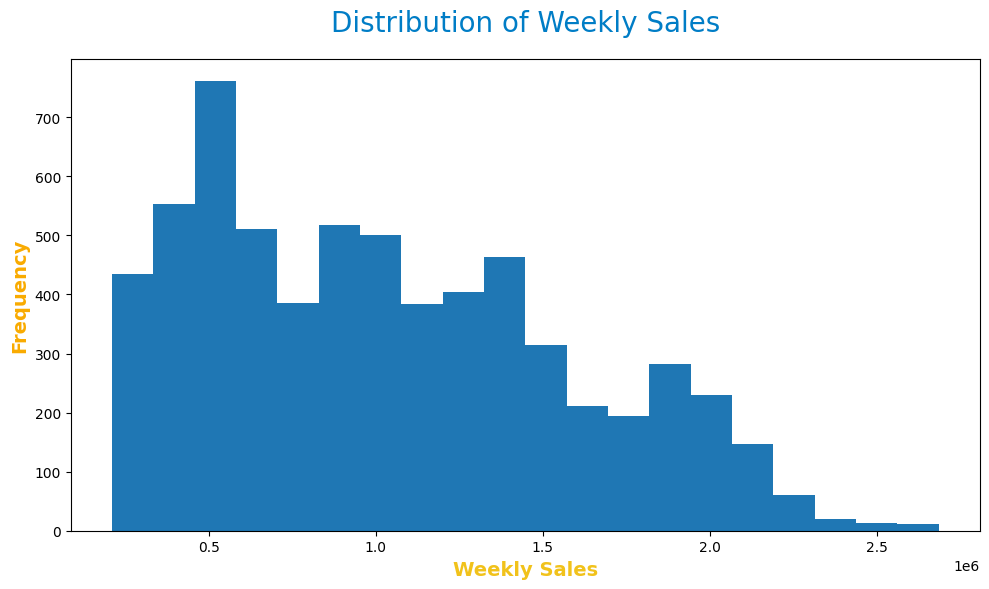

In [31]:
# Set the size of the graph
plt.figure(figsize=(10, 6))

# Plot a histogram of the 'Weekly_Sales' column from the DataFrame
plt.hist(df['Weekly_Sales'], bins=20)

# Set the x and y labels with specified colors, font weight, and font size
plt.xlabel('Weekly Sales', color='#F1C21B', fontweight='bold', fontsize=14)
plt.ylabel('Frequency', color='#F9AB00', fontweight='bold', fontsize=14)

# Set the title with specified color, font style, font size, and padding
plt.title('Distribution of Weekly Sales', color='#007DC6', fontsize=20, pad=20)

# Adjust plot appearance and layout
plt.tight_layout()

# Display the plot
plt.show()

In [32]:
df.groupby('Month')['Weekly_Sales'].mean()

Month
1     9.476139e+05
2     1.054597e+06
3     1.024975e+06
4     1.024324e+06
5     1.035379e+06
6     1.064848e+06
7     1.014212e+06
8     1.044874e+06
9     1.009457e+06
10    1.027683e+06
11    1.093977e+06
12    1.110051e+06
Name: Weekly_Sales, dtype: float64

In [33]:
df.groupby('Year')['Weekly_Sales'].mean()

Year
2010    1.040919e+06
2011    1.033780e+06
2012    1.033660e+06
Name: Weekly_Sales, dtype: float64

In [34]:
df['Holiday_Flag'].value_counts()

False    5960
True      441
Name: Holiday_Flag, dtype: int64

Relation between a categorized feature and the Weekly_Sales

In [35]:
def graph_relation_to_weekly_sale(col_relation, df, x='Week', palette=None):
    cmap = sns.diverging_palette(220, 20, as_cmap=True)

    sns.relplot(
        x=x,
        y='Weekly_Sales',
        hue=col_relation,
        data=df,
        kind='line',
        height=5,
        aspect=2,
        palette=palette
    )
    plt.show()

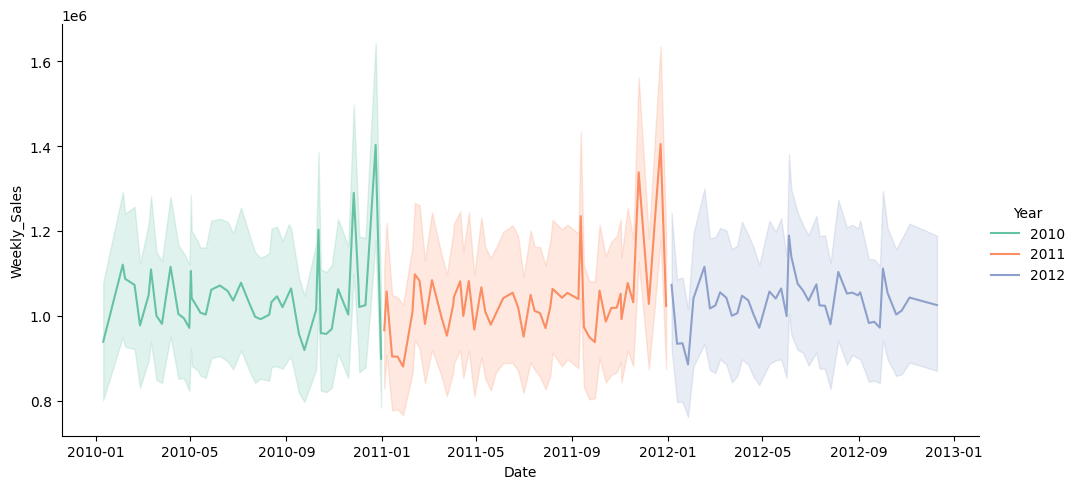

In [36]:
graph_relation_to_weekly_sale('Year', df, x='Date', palette='Set2')

Average Weekly Sales

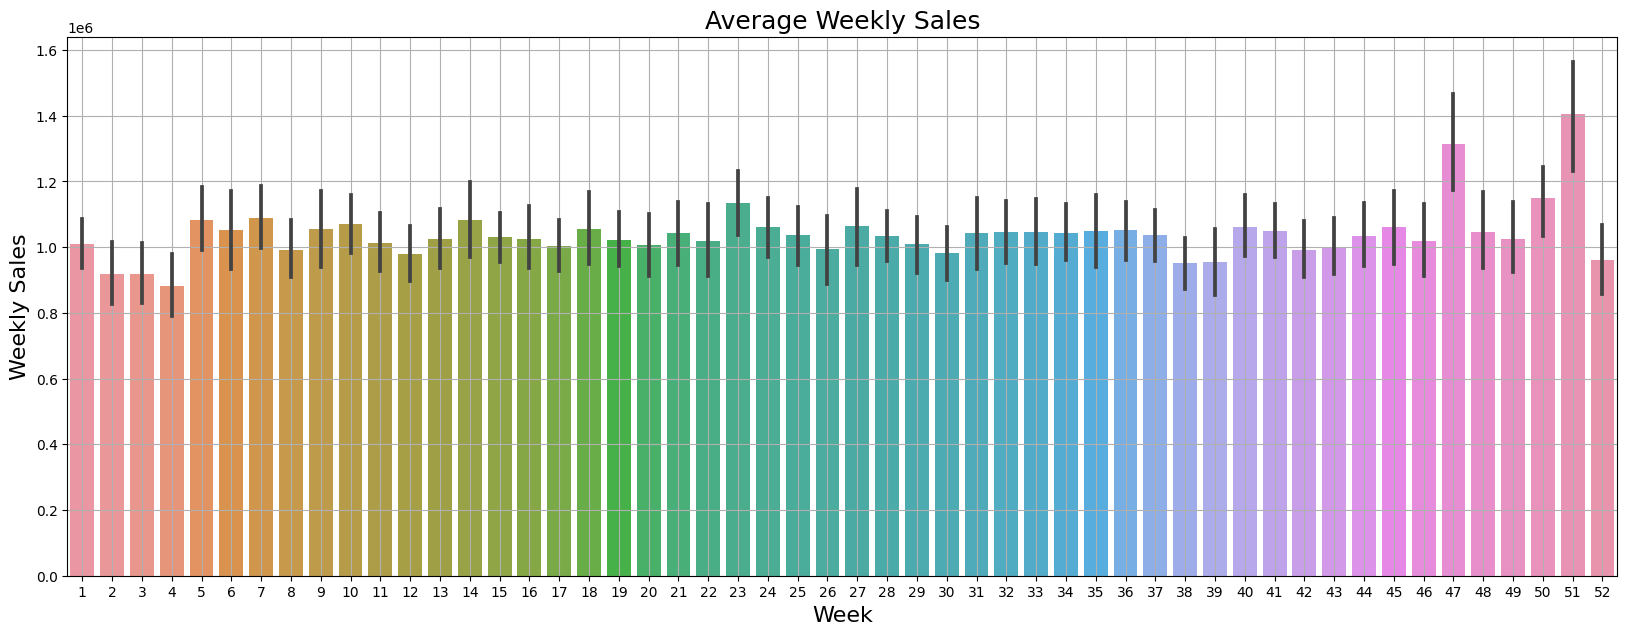

In [37]:
plt.figure(figsize=(20, 7))
sns.barplot(x='Week', y='Weekly_Sales', data=df)
plt.title('Average Weekly Sales', fontsize=18)
plt.ylabel('Weekly Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.grid()
plt.show()

Box plot of Weekly Sales by Store

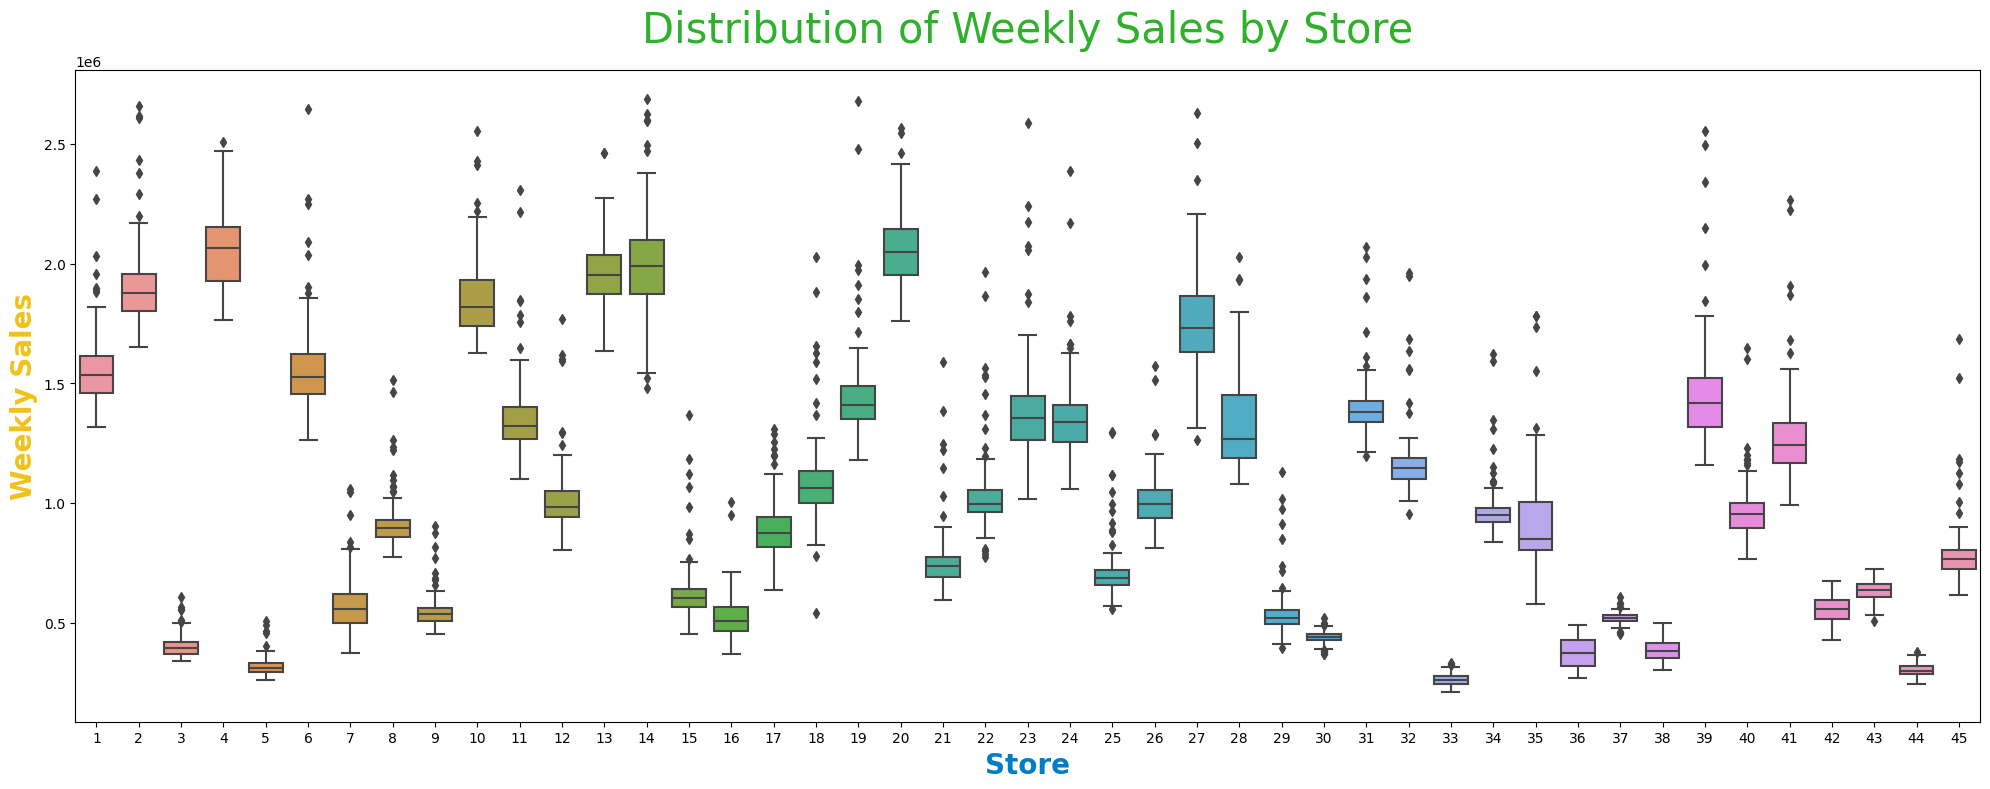

In [38]:
plt.figure(figsize=(20, 8))

# Plot the boxplot
sns.boxplot(x='Store', y='Weekly_Sales', data=df)

# Set the x and y labels with Walmart font colors
plt.xlabel('Store', color='#007DC6', fontweight='bold', fontsize=20)
plt.ylabel('Weekly Sales', color='#F1C21B', fontweight='bold', fontsize=20)

# Set the title with Walmart font colors
plt.title('Distribution of Weekly Sales by Store', color='#2FB12C', fontsize=30, pad=20)

# Set the font size for x-axis labels
plt.xticks(fontsize=10)

# Adjust plot layout
plt.tight_layout()

# Display the plot
plt.show()

Heatmap

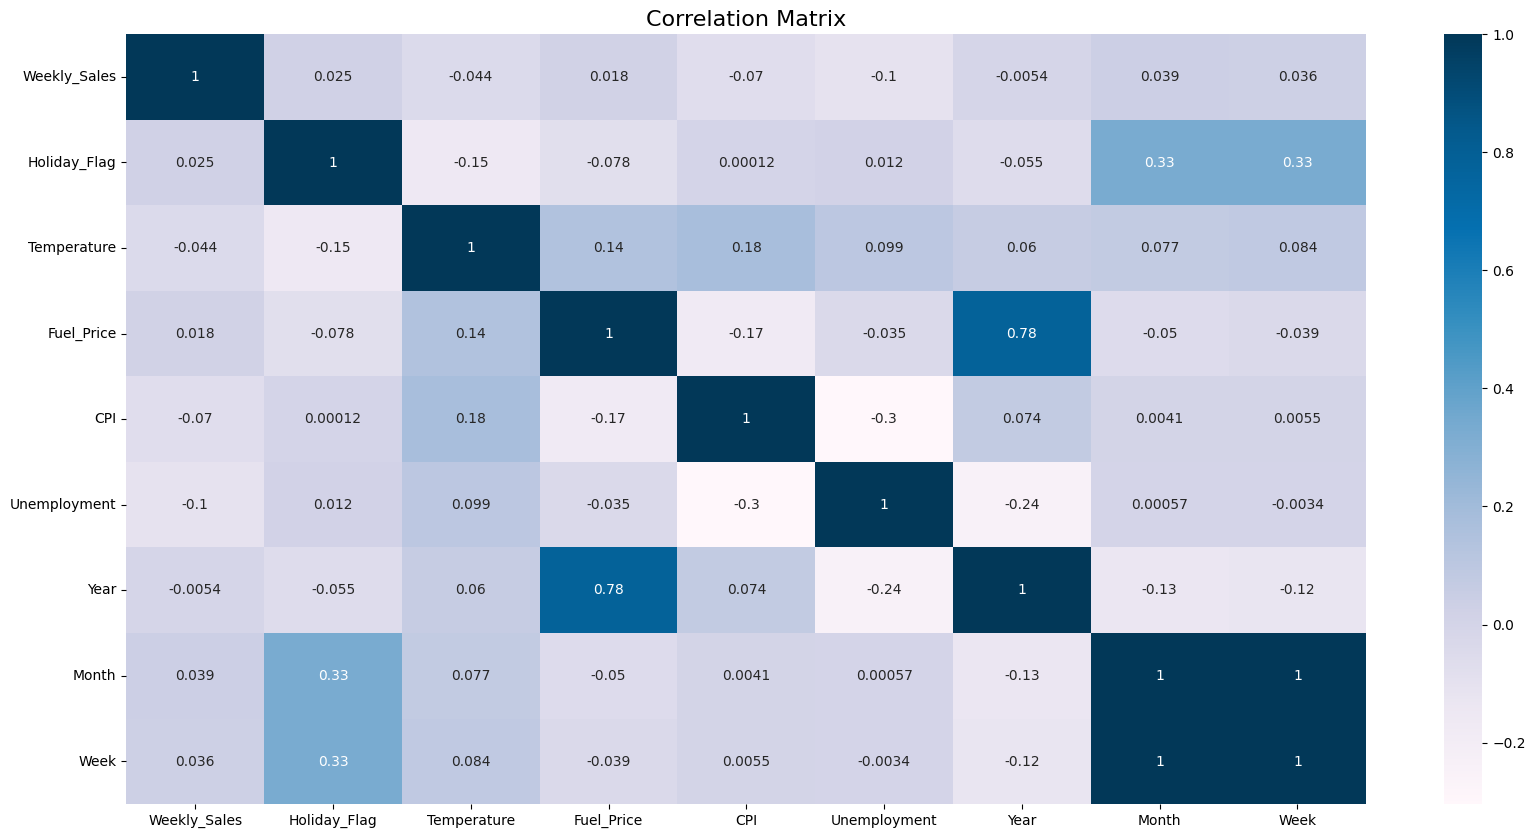

In [39]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), cmap='PuBu', annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.show()

# Correlation Graph

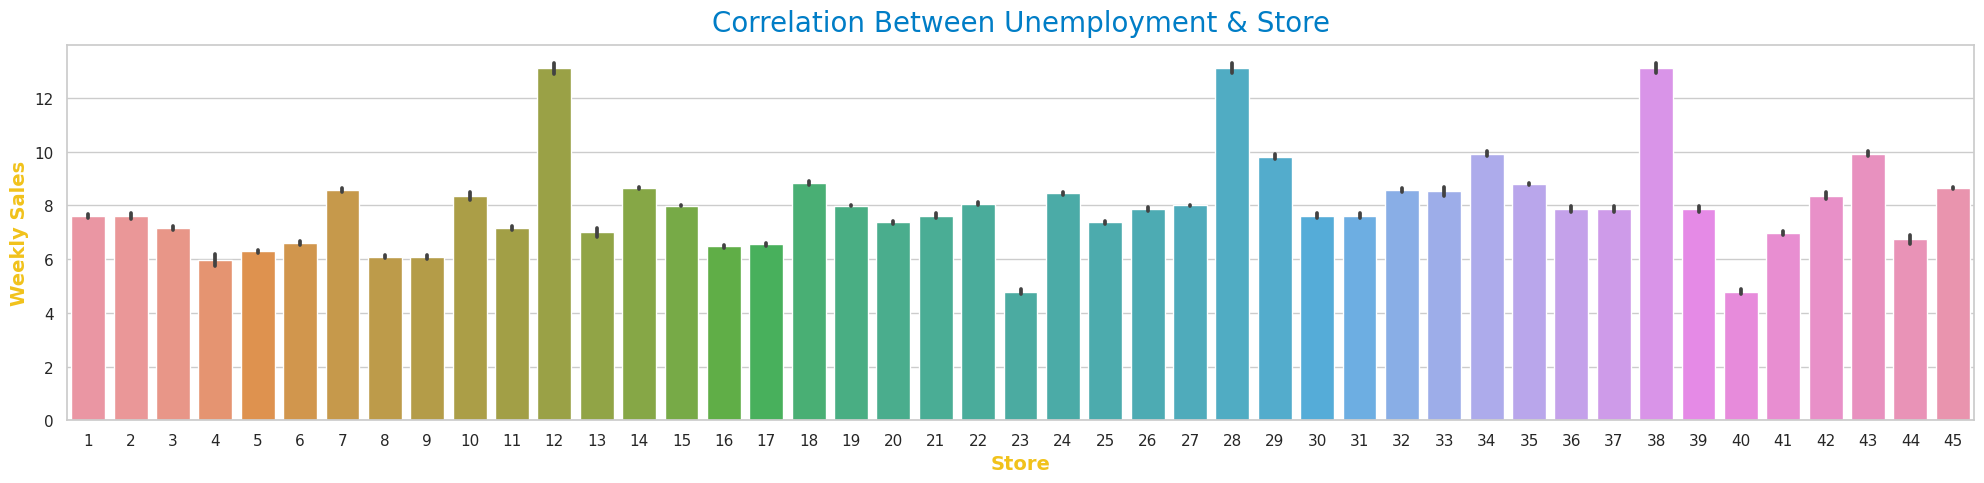

In [40]:
# Correlation between Unemployment & Store
plt.figure(figsize=(20, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='Store', y="Unemployment", data=df)

# Set the title
plt.title('Correlation Between Unemployment & Store', color='#007DC6', fontsize=20, pad=10)

# Set the x and y axis labels
plt.xlabel('Store', color='#F1C21B',  fontweight='bold', fontsize=14)
plt.ylabel('Weekly Sales', color='#F1C21B',  fontweight='bold', fontsize=14)

# Adjust plot layout
plt.tight_layout()

# Display the plot
plt.show()

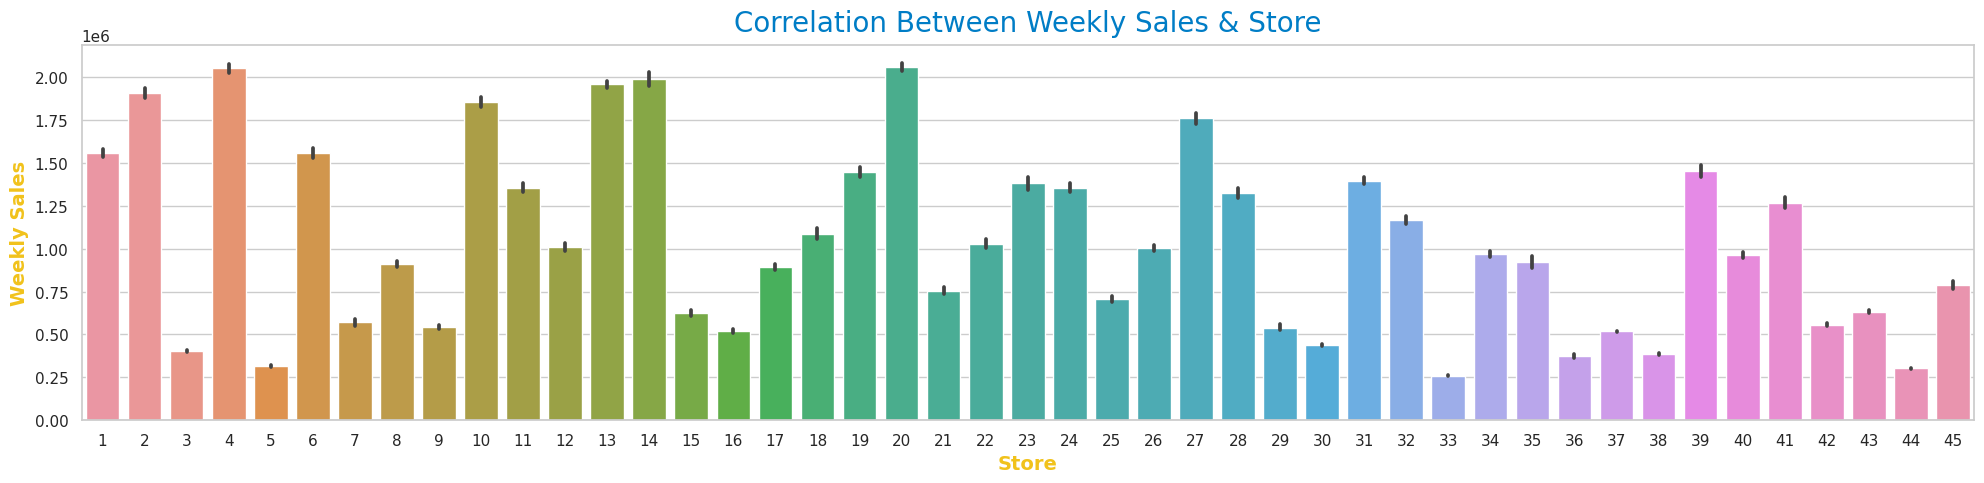

In [41]:
# Correlation between Weekly Sales & Store
plt.figure(figsize=(20, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='Store', y="Weekly_Sales", data=df)

# Set the title
plt.title('Correlation Between Weekly Sales & Store', color='#007DC6', fontsize=20, pad=10)

# Set the x and y axis labels
plt.xlabel('Store', color='#F1C21B',  fontweight='bold', fontsize=14)
plt.ylabel('Weekly Sales', color='#F1C21B',  fontweight='bold', fontsize=14)

# Adjust plot layout
plt.tight_layout()

# Display the plot
plt.show()

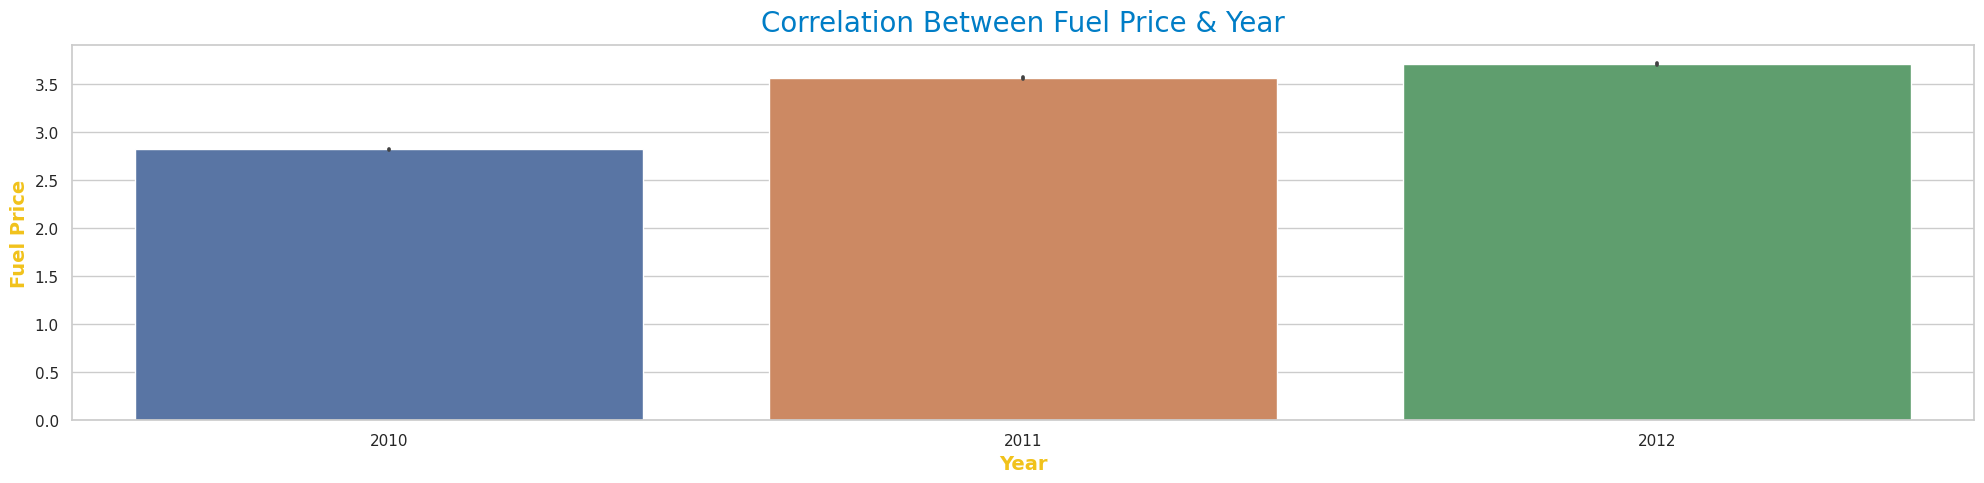

In [42]:
# Correlation b/w Fuel_Price & Year
plt.figure(figsize=(20, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Year", y="Fuel_Price", data=df)
sns.set(rc = {'figure.figsize': (10,4)})

# Set the title
plt.title('Correlation Between Fuel Price & Year', color='#007DC6', fontsize=20, pad=10)

# Set the x and y axis labels
plt.xlabel('Year', color='#F1C21B',  fontweight='bold', fontsize=14)
plt.ylabel('Fuel Price', color='#F1C21B', fontweight='bold',fontsize=14)

# Adjust plot layout
plt.tight_layout()

# Display the plot
plt.show()

<Figure size 2000x500 with 0 Axes>

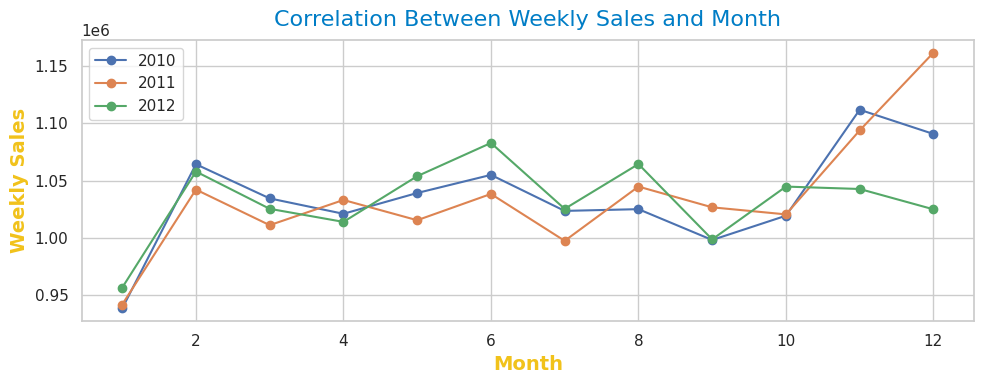

In [43]:
# Correlation between Weekly Sales & Month
plt.figure(figsize=(20, 5))
sns.set_theme(style="whitegrid")
month_wise_sales = df.pivot_table(values="Weekly_Sales", columns="Year", index="Month")
month_wise_sales.plot(marker='o')

# Set the title with Walmart font colors
plt.title('Correlation Between Weekly Sales and Month', color='#007DC6', fontsize=16, pad=10)

# Set the x and y labels with Walmart font colors
plt.xlabel('Month', color='#F1C21B',  fontweight='bold', fontsize=14)
plt.ylabel('Weekly Sales', color='#F1C21B',  fontweight='bold', fontsize=14)

# Adjust plot layout
plt.legend(loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()

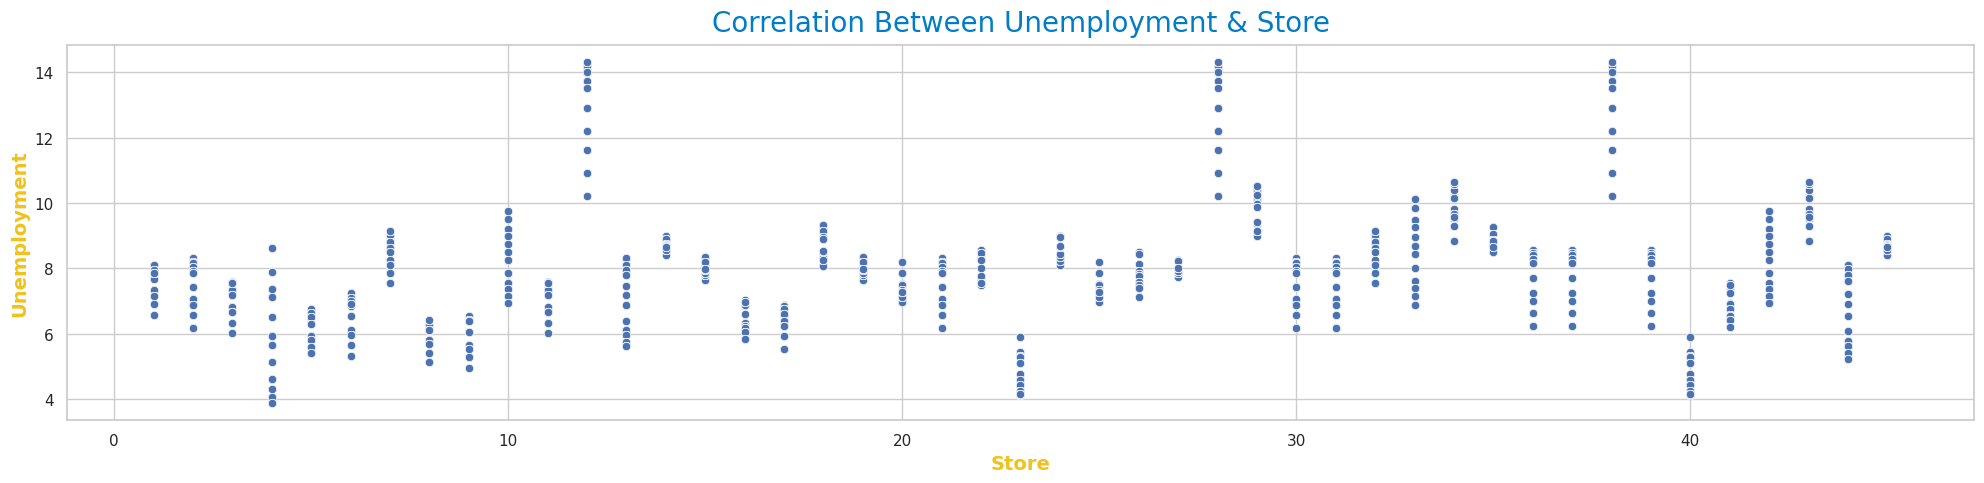

In [44]:
# Correlation between Unemployment & Store
plt.figure(figsize=(20, 5))
sns.set_theme(style="whitegrid")

# Draw Scatterplot
sns.scatterplot(x="Store", y="Unemployment", data=df)

# Set the title
plt.title('Correlation Between Unemployment & Store', color='#007DC6', fontsize=20, pad=10)

# Set the x and y axis labels
plt.xlabel('Store', color='#F1C21B',  fontweight='bold', fontsize=14)
plt.ylabel('Unemployment', color='#F1C21B',  fontweight='bold', fontsize=14)

# Adjust plot layout
plt.tight_layout()

# Display the plot
plt.show()

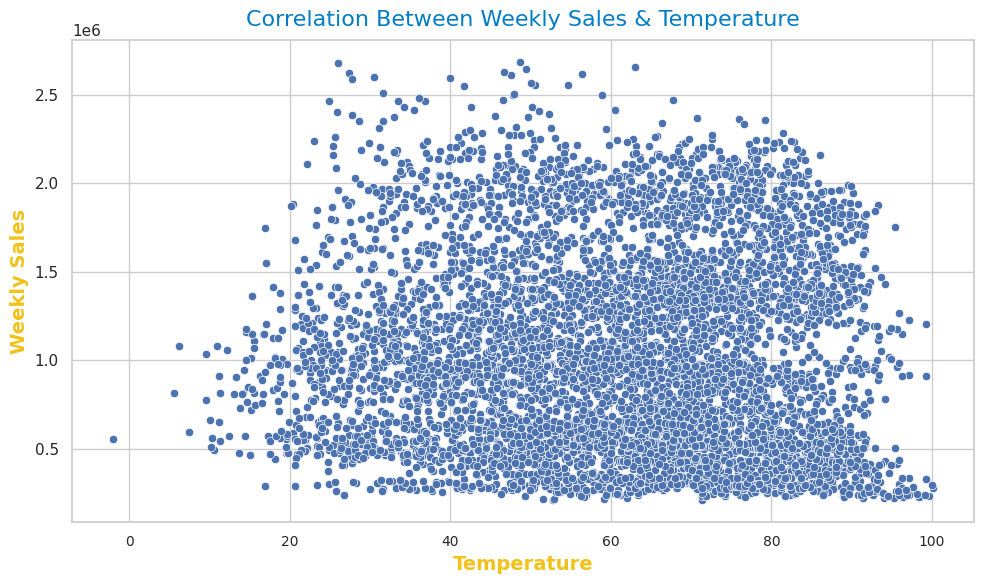

In [45]:
# Scatter plot of Weekly Sales vs. Temperature
plt.figure(figsize=(10, 6))

# Plot the scatter plot
sns.scatterplot(x="Temperature", y="Weekly_Sales", data=df)

# Set the title with Walmart font colors
plt.title('Correlation Between Weekly Sales & Temperature', color='#007DC6', fontsize=16, pad=10)

# Set the x and y labels with Walmart font colors
plt.xlabel('Temperature', color='#F1C21B',  fontweight='bold', fontsize=14)
plt.ylabel('Weekly Sales', color='#F1C21B',  fontweight='bold', fontsize=14)

# Set the font size for x-axis labels
plt.xticks(fontsize=10)

# Adjust plot layout
plt.tight_layout()

# Display the plot
plt.show()

In [46]:

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from xgboost import XGBRegressor

from sklearn import tree
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import *
from sklearn import metrics



---



In [47]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Week'],
      dtype='object')

In [48]:
x = df.drop(['Date','Weekly_Sales'], axis=1)

In [49]:
x

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,1,False,42.31,2.572,211.096358,8.106,2010,5,17
1,1,True,38.51,2.548,211.242170,8.106,2010,12,48
2,1,False,39.93,2.514,211.289143,8.106,2010,2,7
3,1,False,46.63,2.561,211.319643,8.106,2010,2,8
4,1,False,46.50,2.625,211.350143,8.106,2010,5,18
...,...,...,...,...,...,...,...,...,...
6430,45,False,64.88,3.997,192.013558,8.684,2012,9,39
6431,45,False,64.89,3.985,192.170412,8.667,2012,5,19
6432,45,False,54.47,4.000,192.327265,8.667,2012,12,50
6433,45,False,56.47,3.969,192.330854,8.667,2012,10,42


In [50]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6401 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Store         6401 non-null   category
 1   Holiday_Flag  6401 non-null   bool    
 2   Temperature   6401 non-null   float64 
 3   Fuel_Price    6401 non-null   float64 
 4   CPI           6401 non-null   float64 
 5   Unemployment  6401 non-null   float64 
 6   Year          6401 non-null   int64   
 7   Month         6401 non-null   int64   
 8   Week          6401 non-null   int64   
dtypes: bool(1), category(1), float64(4), int64(3)
memory usage: 672.0 KB


In [51]:
y = df['Weekly_Sales']

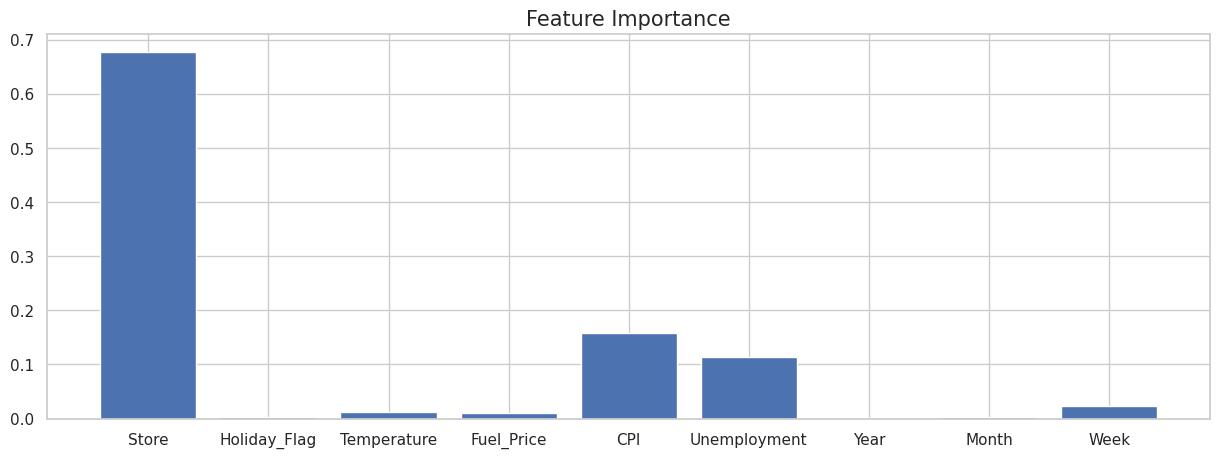

In [52]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(x, y)
RandomForestRegressor()
# checking the feature importance

plt.figure(figsize = (15, 5))
plt.bar(x.columns, rf.feature_importances_)
plt.title("Feature Importance", fontsize = 15)
plt.show()

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 0)

R2 Score:  0.1640905885815509
MSE Score:  270519048713.93335
RMSE :  520114.4573206299


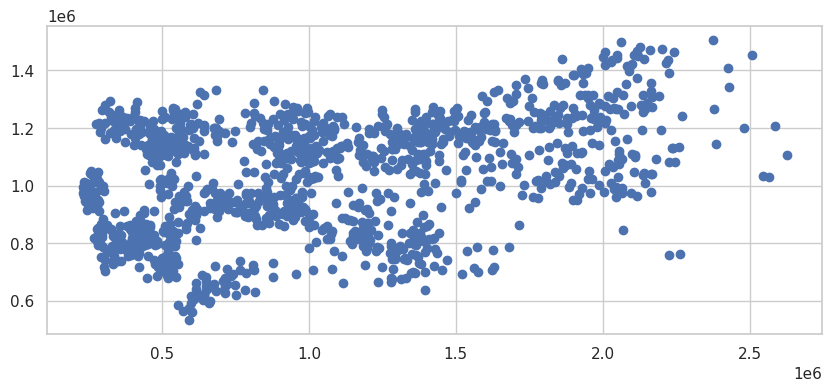

In [54]:
#Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)
LinearRegression()
y_pred = lr.predict(x_test)
plt.scatter(y_test, y_pred)

print("R2 Score: ", r2_score(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("RMSE : ", sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.9203742962187489
MSE Score:  25768665056.097343
RMSE :  160526.21298746613


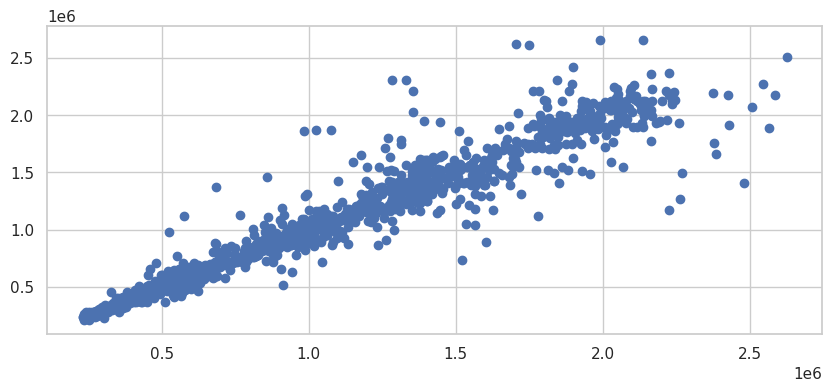

In [55]:
#Decision Tree
dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)
DecisionTreeRegressor()
y_pred1 = dtree.predict(x_test)
plt.scatter(y_test, y_pred1)

print("R2 Score: ", r2_score(y_test, y_pred1))
print("MSE Score: ", mean_squared_error(y_test, y_pred1))
print("RMSE : ", sqrt(mean_squared_error(y_test, y_pred1)))

R2 Score:  0.9530368529163145
MSE Score:  15198328551.096323
RMSE :  123281.50125260612


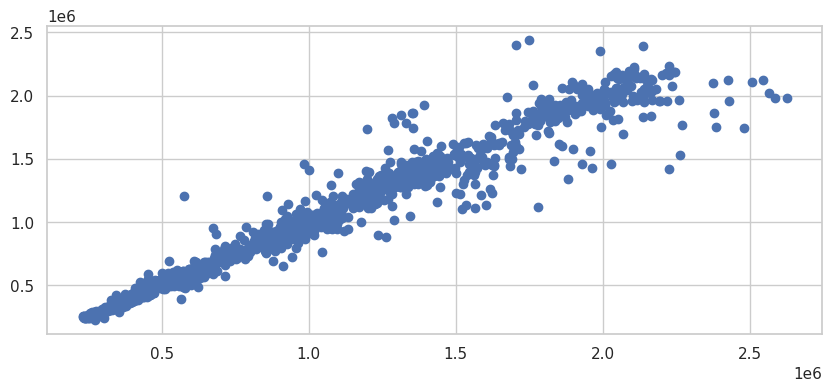

In [56]:
#Random Forest
rf1 = RandomForestRegressor(n_estimators = 100)
rf1.fit(x_train, y_train)
RandomForestRegressor()
y_pred2 = rf1.predict(x_test)
plt.scatter(y_test, y_pred2)

print("R2 Score: ", r2_score(y_test, y_pred2))
print("MSE Score: ", mean_squared_error(y_test, y_pred2))
print("RMSE : ", sqrt(mean_squared_error(y_test, y_pred2)))

R2 Score:  0.4890754165027007
MSE Score:  165346663650.68936
RMSE :  406628.4097928837


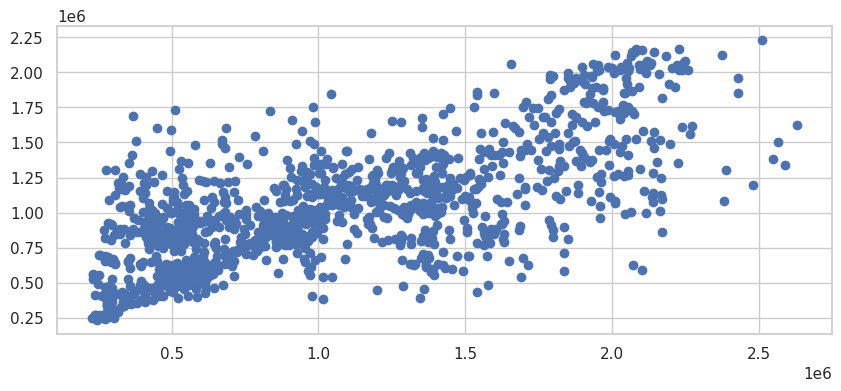

In [57]:
#KNN
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
KNeighborsRegressor()
y_pred3 = knn.predict(x_test)
plt.scatter(y_test, y_pred3)

print("R2 Score: ", r2_score(y_test, y_pred3))
print("MSE Score: ", mean_squared_error(y_test, y_pred3))
print("RMSE : ", sqrt(mean_squared_error(y_test, y_pred3)))

In [58]:
#XGBoost

# Specify the features and target variable
features = ['Store', 'Year', 'Month']
target = 'Weekly_Sales'

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [59]:
# Create and train the XGBoost model with enable_categorical=True
xg = XGBRegressor(n_estimators=100, random_state=42, enable_categorical=True)
xg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

R2 Score:  0.9248258065451529
MSE Score:  23872625335.60029
RMSE Score:  154507.68697899886


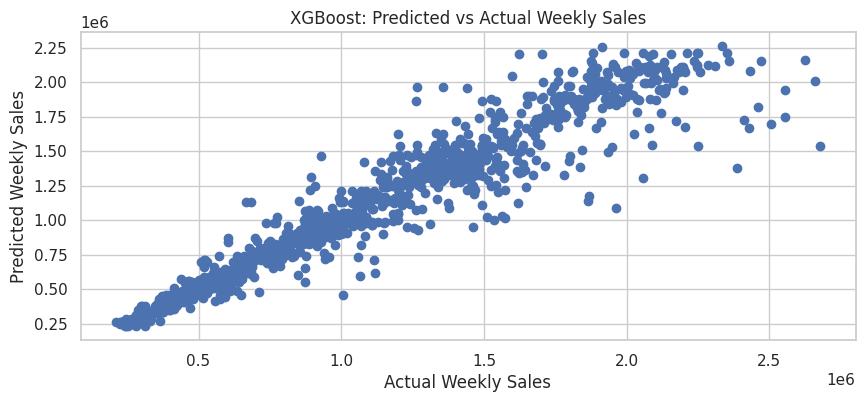

In [60]:
# Make predictions on the test set
y_pred4 = xg.predict(x_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred4)
mse = mean_squared_error(y_test, y_pred4)
rmse = np.sqrt(mse)

print("R2 Score: ", r2)
print("MSE Score: ", mse)
print("RMSE Score: ", rmse)

# Plot predicted vs actual values
plt.scatter(y_test, y_pred4)
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("XGBoost: Predicted vs Actual Weekly Sales")
plt.show()

R2 Score:  0.08903920858824954
MSE Score:  289288446863.84094
RMSE :  537855.4144599094


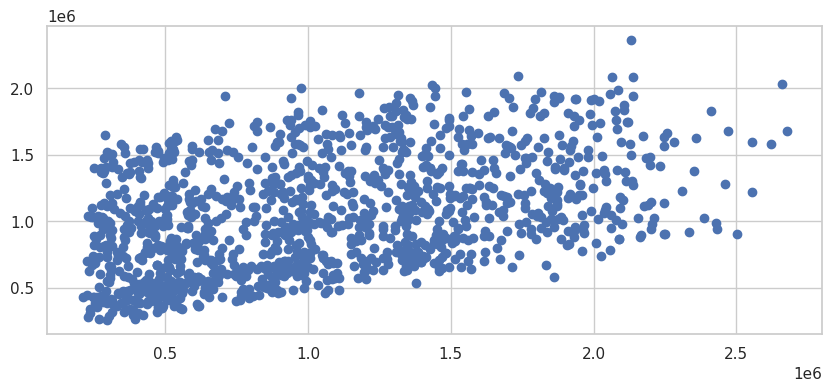

In [61]:
# Getting Average of Best Models
y_pred_final = (y_pred1 + y_pred2  + y_pred4)/3.0
plt.scatter(y_test, y_pred_final)

print("R2 Score: ", r2_score(y_test, y_pred_final))
print("MSE Score: ", mean_squared_error(y_test, y_pred_final))
print("RMSE : ", sqrt(mean_squared_error(y_test, y_pred_final)))

In [62]:
# Calculate summary statistics
summary_stats = df.describe()

In [63]:
# Perform statistical tests or correlations
# Example: Calculate correlation between Weekly Sales and Unemployment Rate
correlation = df['Weekly_Sales'].corr(df['Unemployment'])

In [64]:
# Additional statistical tests
# Example: t-test comparing Weekly Sales between two groups (Group_A and Group_B)
group_a_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales']
group_b_sales = df[df['Holiday_Flag'] == 1]['Weekly_Sales']
t_stat, p_value = stats.ttest_ind(group_a_sales, group_b_sales)

Perform t-test

In [65]:
# Perform t-test
t_stat, p_value = stats.ttest_ind(group_a_sales, group_b_sales)

# Print the results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Statistic: -2.029118506966506
P-Value: 0.042487534639960314


#OR

In [66]:
# Perform t-test
#t_stat, p_value = stats.ttest_ind(group_a_sales, group_b_sales)

# Create a DataFrame to display the results
#results_df = pd.DataFrame({'T-Statistic': [t_stat], 'P-Value': [p_value]})

# Display the results
#display(results_df)

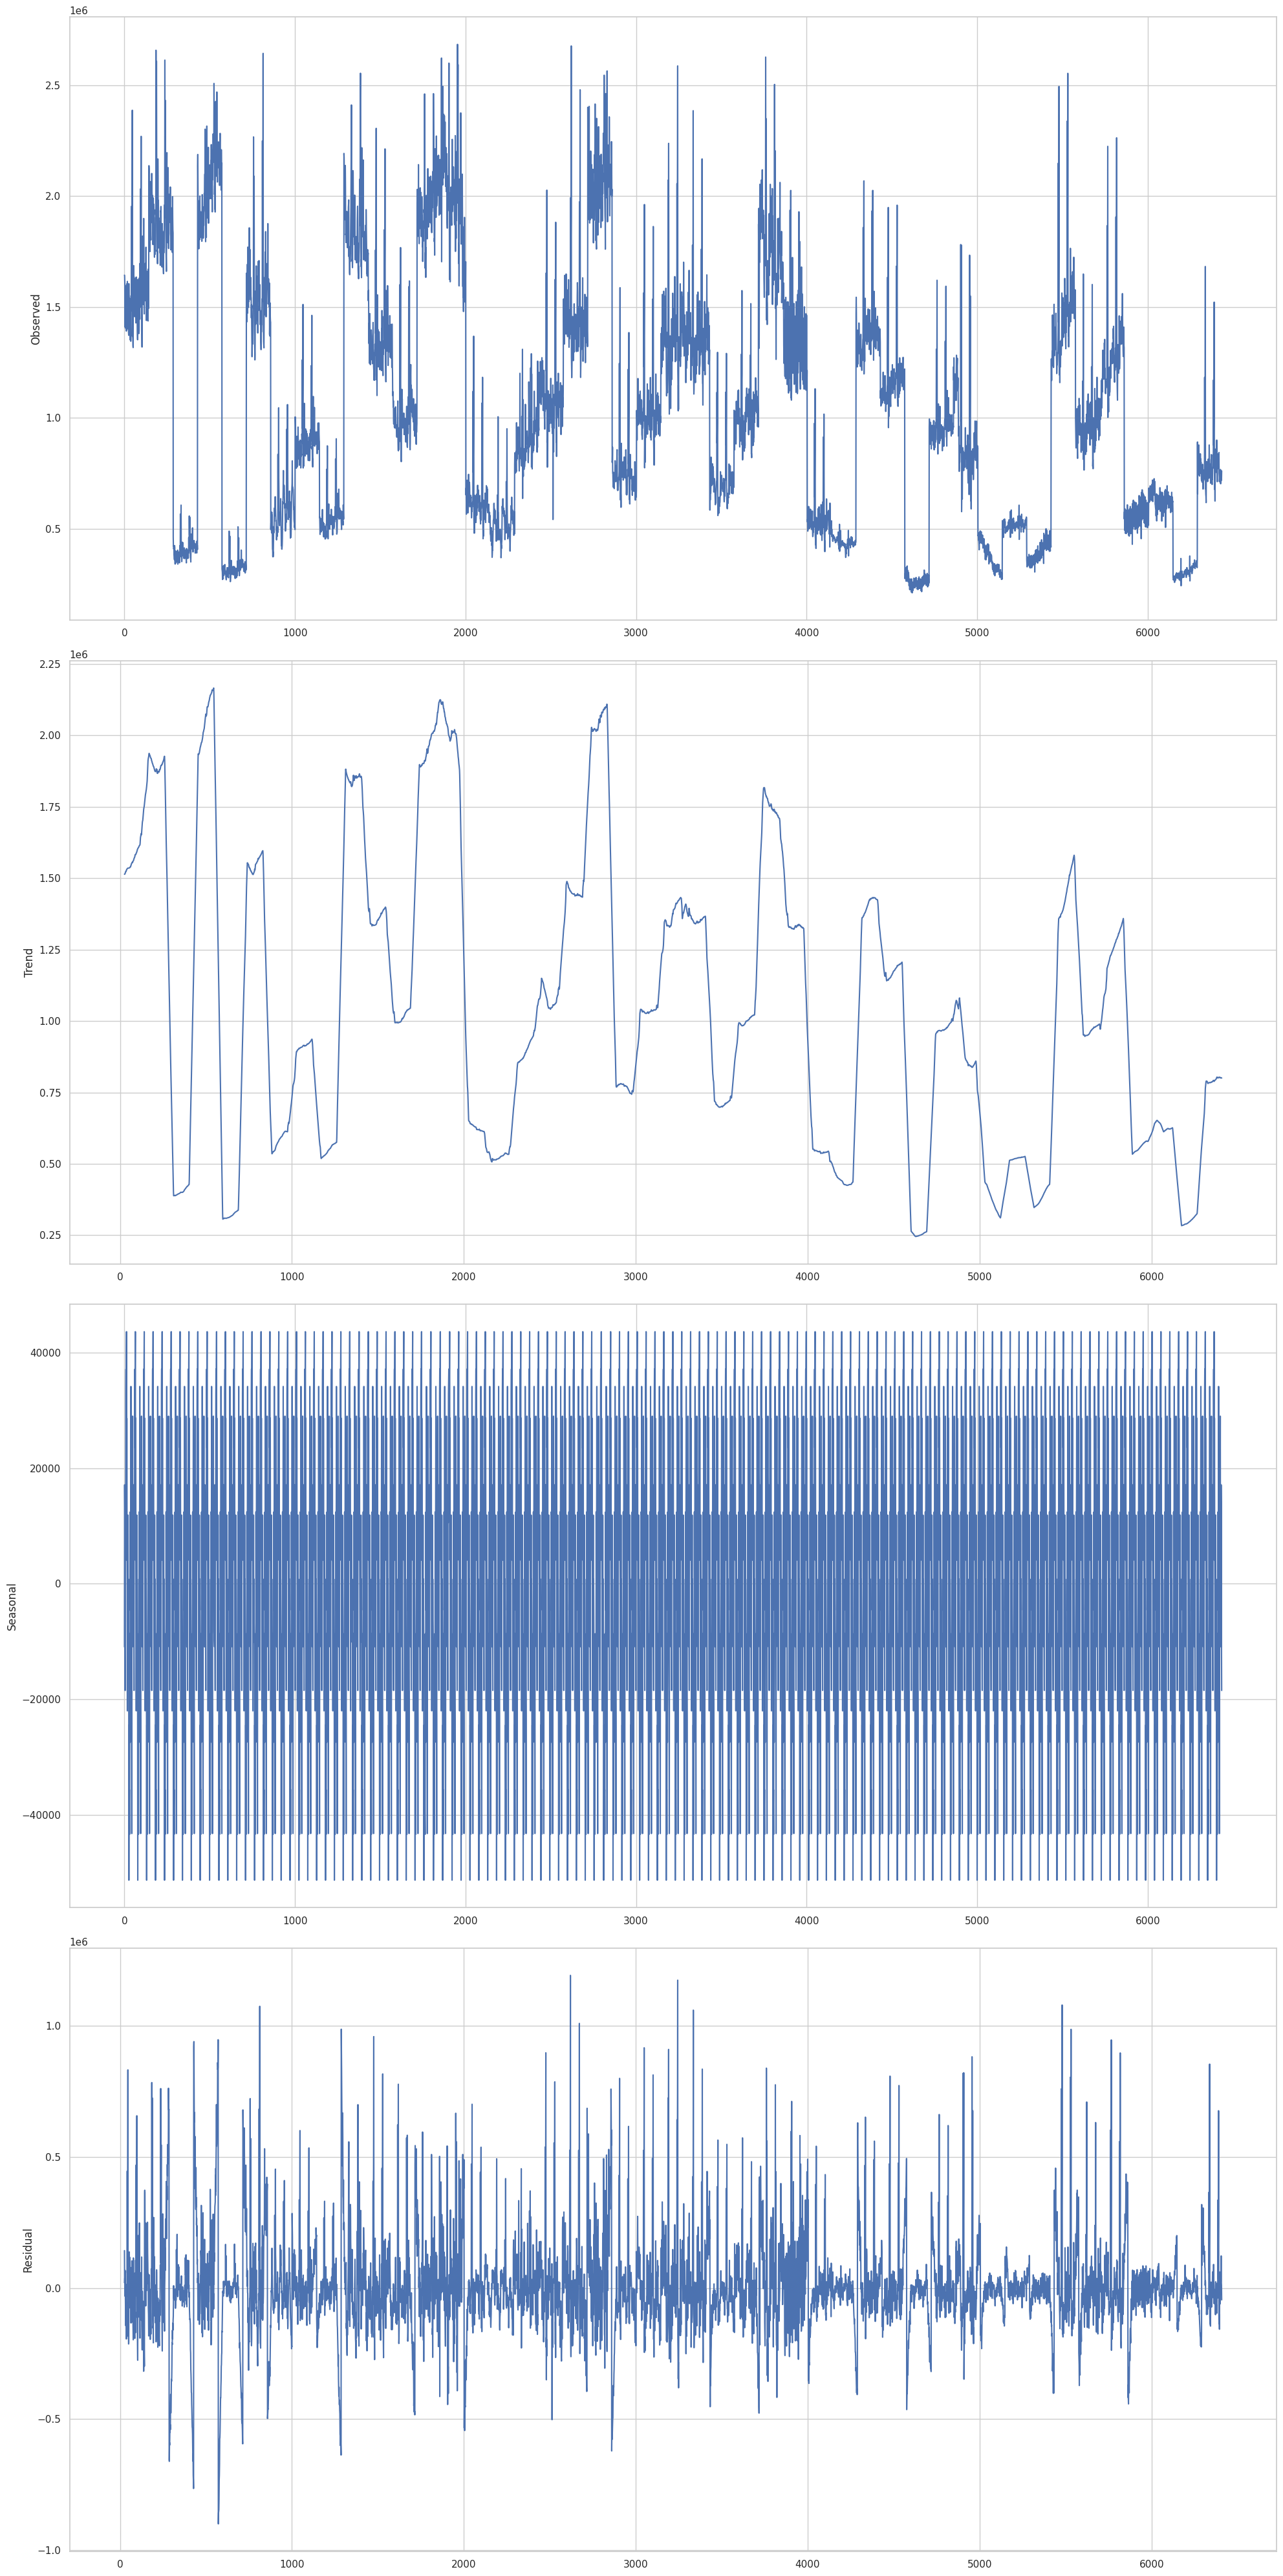

In [67]:
#3. Apply time series analysis to identify seasonal trends:

# Use seasonal decomposition to identify seasonal, trend, and residual components
result = sm.tsa.seasonal_decompose(df['Weekly_Sales'], model='additive', period=52)

# Plot the decomposed components
fig, ax = plt.subplots(4, 1, figsize=(20, 40))
result.observed.plot(ax=ax[0])
ax[0].set_ylabel('Observed')
result.trend.plot(ax=ax[1])
ax[1].set_ylabel('Trend')
result.seasonal.plot(ax=ax[2])
ax[2].set_ylabel('Seasonal')
result.resid.plot(ax=ax[3])
ax[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()

In [68]:
#4. Analyze the impact of variables on weekly sales:

# Assuming you have additional variables (unemployment rate, temperature, and CPI) in your dataset

# Create a matrix of independent variables
X = df[['Unemployment', 'Temperature', 'CPI']]

# Add constant to the matrix
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(df['Weekly_Sales'], X)
results = model.fit()

# Print the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     48.68
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           4.22e-31
Time:                        10:31:55   Log-Likelihood:                -93560.
No. Observations:                6401   AIC:                         1.871e+05
Df Residuals:                    6397   BIC:                         1.872e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.633e+06   5.09e+04     32.065   

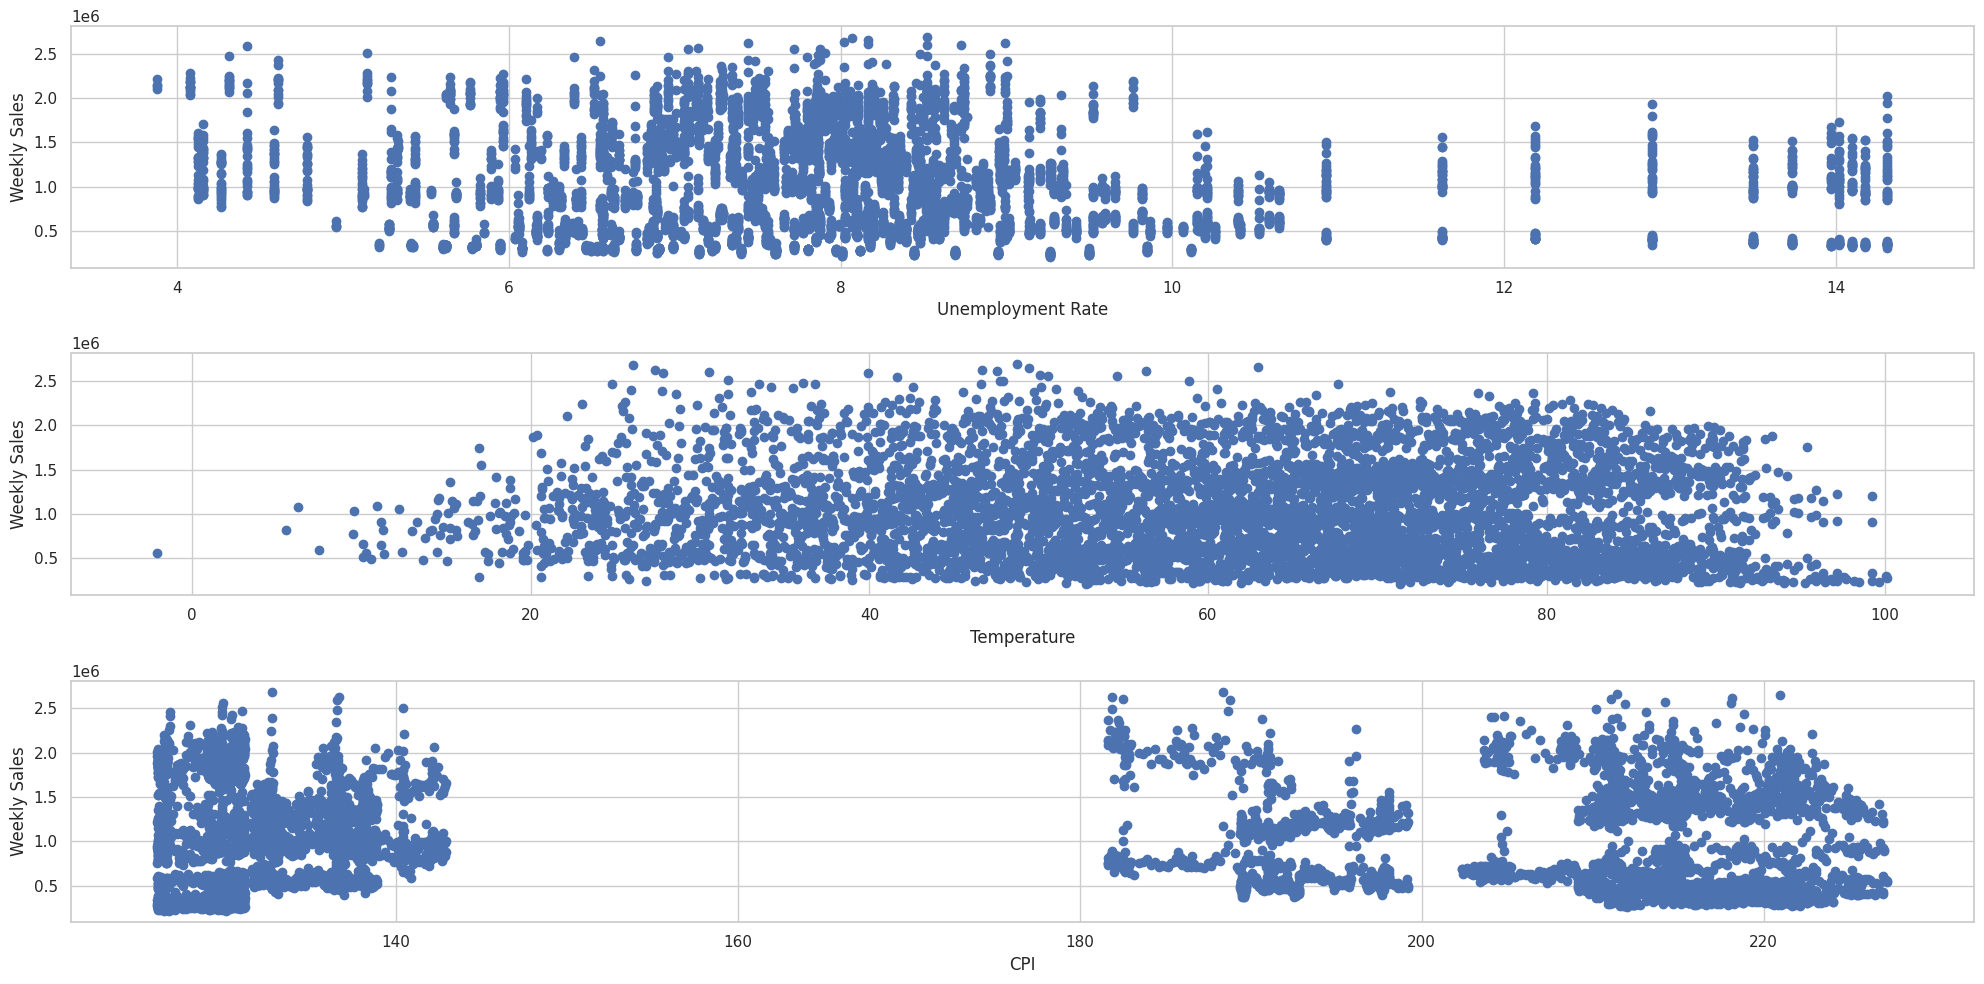

In [69]:
#5. Visualize relationships using appropriate plots:

# Scatter plots of the variables against weekly sales
fig, axs = plt.subplots(3, 1, figsize=(20, 10))
axs[0].scatter(df['Unemployment'], df['Weekly_Sales'])
axs[0].set_xlabel('Unemployment Rate')
axs[0].set_ylabel('Weekly Sales')
axs[1].scatter(df['Temperature'], df['Weekly_Sales'])
axs[1].set_xlabel('Temperature')
axs[1].set_ylabel('Weekly Sales')
axs[2].scatter(df['CPI'], df['Weekly_Sales'])
axs[2].set_xlabel('CPI')
axs[2].set_ylabel('Weekly Sales')

plt.tight_layout()
plt.show()

In [70]:
#2. Aggregate the weekly sales data by store and calculate total sales:

# Assuming you have already loaded and preprocessed the Walmart dataset

# Group the dataset by store
df_by_store = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Sort the stores based on total sales
df_by_store_sorted = df_by_store.sort_values('Weekly_Sales', ascending=False)

# Print the top 5 best performing stores
print("Top 5 Best Performing Stores:")
print(df_by_store_sorted.head())

# Print Empty Row
print("")

# Print the worst performing stores
print("Top 5 Worst Performing Store:")
print(df_by_store_sorted.tail(5))

Top 5 Best Performing Stores:
   Store  Weekly_Sales
3      4  2.810352e+08
19    20  2.800237e+08
13    14  2.761276e+08
1      2  2.687221e+08
12    13  2.682025e+08

Top 5 Worst Performing Store:
   Store  Weekly_Sales
37    38   55159626.42
35    36   53412214.97
4      5   45475688.90
43    44   43293087.84
32    33   37160221.96


In [71]:
#3. Rank the stores based on their historical sales data to identify the top performing stores:

# Add a rank column based on total sales
df_by_store_sorted['Rank'] = np.arange(1, len(df_by_store_sorted) + 1)

# Print the ranked stores
print("Ranked Stores:")
print(df_by_store_sorted)

Ranked Stores:
   Store  Weekly_Sales  Rank
3      4  2.810352e+08     1
19    20  2.800237e+08     2
13    14  2.761276e+08     3
1      2  2.687221e+08     4
12    13  2.682025e+08     5
9     10  2.556789e+08     6
26    27  2.480387e+08     7
0      1  2.224028e+08     8
5      6  2.210286e+08     9
38    39  2.074455e+08    10
18    19  2.066349e+08    11
30    31  1.996139e+08    12
22    23  1.960163e+08    13
23    24  1.940160e+08    14
10    11  1.939628e+08    15
27    28  1.892637e+08    16
40    41  1.813419e+08    17
31    32  1.668192e+08    18
17    18  1.551147e+08    19
21    22  1.470756e+08    20
11    12  1.442872e+08    21
25    26  1.434164e+08    22
33    34  1.382498e+08    23
39    40  1.378703e+08    24
34    35  1.315207e+08    25
7      8  1.299512e+08    26
16    17  1.277821e+08    27
44    45  1.123953e+08    28
20    21  1.081179e+08    29
24    25  1.010612e+08    30
42    43  9.056544e+07    31
14    15  8.913368e+07    32
6      7  8.159828e+07    33

In [72]:
# Create a new column 'Date' based on the index
df['Date'] = df.index

# If the index is not in the correct date format, convert it to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Reset the index since we now have the 'Date' column
df.reset_index(drop=True, inplace=True)

# Now, the 'Date' column should be restored in your DataFrame
print(df.head())

  Store                          Date  Weekly_Sales  Holiday_Flag  \
0     1 1970-01-01 00:00:00.000000000    1643690.90         False   
1     1 1970-01-01 00:00:00.000000001    1641957.44          True   
2     1 1970-01-01 00:00:00.000000002    1611968.17         False   
3     1 1970-01-01 00:00:00.000000003    1409727.59         False   
4     1 1970-01-01 00:00:00.000000004    1554806.68         False   

   Temperature  Fuel_Price         CPI  Unemployment  Year  Month  Week  
0        42.31       2.572  211.096358         8.106  2010      5    17  
1        38.51       2.548  211.242170         8.106  2010     12    48  
2        39.93       2.514  211.289143         8.106  2010      2     7  
3        46.63       2.561  211.319643         8.106  2010      2     8  
4        46.50       2.625  211.350143         8.106  2010      5    18  


In [73]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Week'],
      dtype='object')

In [74]:
#2. Load the dataset and preprocess the data:

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

In [75]:
#3. Split the dataset into training and testing sets:

# Split the dataset into 80% train and 20% test
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

In [76]:
#4. Choose a predictive modeling technique:
#- For linear regression:

model = RandomForestRegressor()

#- For time series forecasting, you may use SARIMAX from the statsmodels library. However, this requires additional preprocessing and stationarity checks for the time series.

In [77]:
#5. Implement and train the model:

# Assuming you have selected the predictive modeling technique (e.g., Random Forest)

# Separate the target variable from the features
X_train, y_train = train_data.drop('Weekly_Sales', axis=1), train_data['Weekly_Sales']
X_test, y_test = test_data.drop('Weekly_Sales', axis=1), test_data['Weekly_Sales']

# Fit the model on the training data
model.fit(X_train, y_train)

RandomForestRegressor()

Mean Squared Error: 303464742634.45807


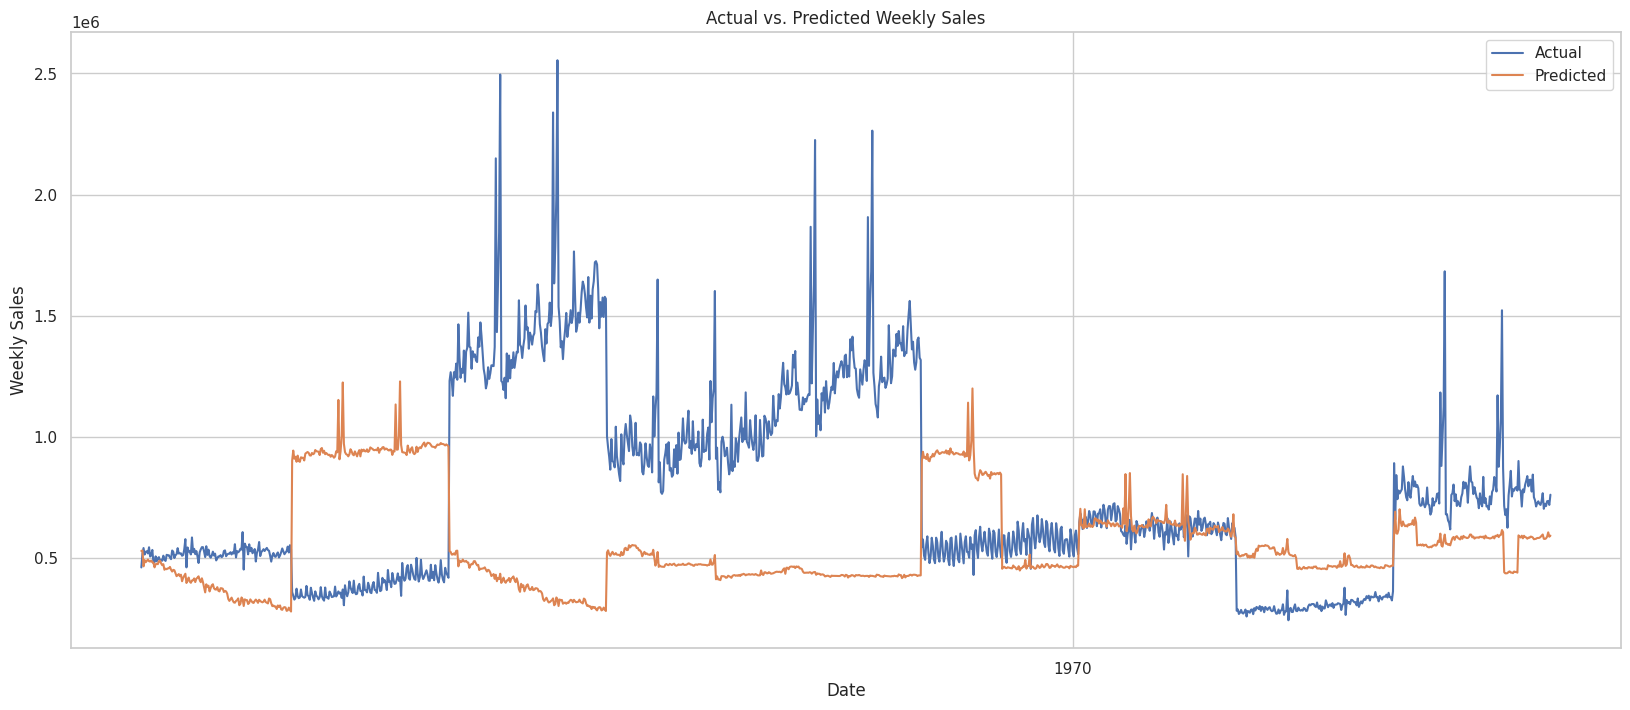

In [78]:
#6. Evaluate the model's performance:

plt.figure(figsize=(20, 8))

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualize the actual vs. predicted values
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Actual vs. Predicted Weekly Sales')
plt.legend()
plt.show()